In [1]:
from keyword import iskeyword
import numpy as np


def is_valid_var_name(name):
    return name.isidentifier() and not iskeyword(name)


class Table(object):
    def __init__(self, data,
                 row_label=None, row_categories=None,
                 column_label=None, column_categories=None):
        self.row_label = row_label
        self.row_categories = row_categories
        self.column_label = column_label
        self.column_categories = column_categories
        self._data = np.asarray(data, dtype=object)
    
    def __getitem__(self, key):
        return self._data[key]
    
    def __setitem__(self, key, item):
        self._data[key] = item
    
    def __call__(self, row_key, column_key):
        return self._data[self.row_categories.index(row_key)][self.column_categories.index(column_key)]
        
        
def draw_table(data,
               row_label=None, row_categories=None,
               column_label=None, column_categories=None,
               name=None, frame=False, **kwargs):
    if isinstance(data, Table):
        row_label = data.row_label
        row_categories = data.row_categories
        column_label = data.column_label
        column_categories = data.column_categories
        data = data[:]
    
    assert len(data) >= 1 and len(data[0]) >= 1
    assert name is None or is_valid_var_name(name)
    
    if 'skip_zeroes' not in kwargs: kwargs['skip_zeroes'] = True
    if 'truncate' not in kwargs: kwargs['truncate'] = True
        
    if name is not None:
        globals()[name] = Table(data,
                                row_label=row_label, 
                                row_categories=row_categories,
                                column_label=column_label, 
                                column_categories=column_categories)
    
    cat_or_label = any([row_label, column_label, 
                        row_categories, column_categories])
    
    s = r'\begin{array}{'
    if frame:
        s += '|'
    if cat_or_label:
        s += 'r|'
    s += 'c{}'.format('|' if frame else ' ') * len(data[0]) + '} '
    if frame:
        s += r'\hline '
    if row_categories:
        s += r'{\bf ' + row_label + r' \backslash ' + column_label + '} & '
        for l in column_categories:
            s += r'{\bf ' + str(l) + '}' + ' & '
        s = s[:-2] + r' \\ \hline '
    for i, row in enumerate(data):
        if row_categories:
            s += r'{\bf' + str(row_categories[i]) + '} & '
        for e in row:
            if parent(e) is RR:
                s += e.str(**kwargs)
            else:
                s += str(e)
            s += ' & '
        s = s[:-2] + r'\\ '
        if frame:
            s += r'\hline '
    s += r'\end{array}'
    return s

##### F21ETSMP Group Assignment 5
# Simultaneous Random Variables, Data Sampling, Transformation, Multivariate and CLT

## Simultaneous Random Variables
Two discrete random variables X and Y have a joint pmf $f_{XY}(x,y)$ as given in the following table:  
  
{{draw_table([[0.04, 0.06, 0.18], ['', 0.06, 0.], [0.08, '', 0.08], [0.14, 0.08, '']], 'X', [10, 20, 30, 40], 'Y', [-100, 0, 100], name='pmf')}}
(table saved as variable 'pmf')  
  
It is furthermore known, that $Pr(Y=0) = 0.28$ and $Pr(Y=-100 \mid X=20) = 0.50$.  

### 1) Fill in the empty places in the joint pmf-table.

To fill in the blanks, the two given probabilities can be used.
Firstly the probability that $Y = 0$ can be used to find the probability of $X = 30 \land Y = 0$ since the second row must sum up to the total probability that $Y = 0$:

In [5]:
pmf[2,1] = 0.28 - (pmf[0,1] + pmf[1,1] + pmf[3,1]); pmf[2,1]

0.0800000000000000

Next, the probability that $Y = -100$ given $X = 20$ specifies that the empty field in the second row should amount to half that row or the remainder of the row:

In [6]:
pmf[1,0] = sum(pmf[1,1:]); pmf[1,0]

0.0600000000000000

Now the final empty cell in the table can be filled since the sum of all the probabilities must sum to one:

In [7]:
pmf[3,2] = 0  # set last cell to zero to allow the use of sum
pmf[3,2] = 1 - sum(pmf[:,:])
pmf[3,2]

0.140000000000000

Leading to the following pmf table:  
{{draw_table(pmf)}}

### 2.Calculate and sketch the marginals $f_X(x)$ and $f_Y(y)$.

The marginals are calculated by collapsing the joint pmf along the other axis:

[0.280000000000000, 0.120000000000000, 0.240000000000000, 0.360000000000000]
[0.320000000000000, 0.280000000000000, 0.400000000000000]


<BarContainer object of 4 artists>

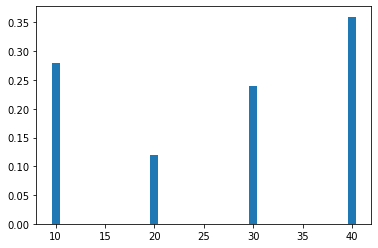

In [22]:
import matplotlib.pyplot as plt
pmf_x = [sum(pmf[i,:]) for i in range(len(pmf[:,0]))]
pmf_y = [sum(pmf[:,i]) for i in range(len(pmf[0,:]))]
print(pmf_x)
print(pmf_y)
plt.bar(pmf.row_categories, pmf_x)

### 3.Calculate the means and variances $EX$, $EY$, $Var(X)$, $Var(Y)$ and $E[XY]$.

### 4.Calculate the correlation $corr(X,Y)$, covariance $cov(X,Y)$ and correlation coefficient $\rho_{XY}$.

### 5.Are the random variables X and Y independent?